## Pandas Data Frames

- Applying functions, working with Numpy functions
- Concatenating & Merging
- Dealing with Missing values
- Dummy Variables
- I/O operations

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [2]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
div.output_area {
    width: 80%;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [3]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0],
    'js-score': [71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0]

}

students_df = pd.DataFrame(data=data)
students_df

,name,city,age,py-score,js-score
0,Xavier,Mexico City,41,88.0,71.0
1,Ann,Toronto,28,79.0,95.0
2,Jana,Prague,33,81.0,88.0
3,Yi,Shanghai,34,80.0,79.0
4,Robin,Manchester,38,68.0,91.0
5,Amal,Cairo,31,61.0,91.0
6,Nori,Osaka,37,84.0,80.0


### Applying functions

### Applying Arithmetic functions

In [4]:
students_df

,name,city,age,py-score,js-score
0,Xavier,Mexico City,41,88.0,71.0
1,Ann,Toronto,28,79.0,95.0
2,Jana,Prague,33,81.0,88.0
3,Yi,Shanghai,34,80.0,79.0
4,Robin,Manchester,38,68.0,91.0
5,Amal,Cairo,31,61.0,91.0
6,Nori,Osaka,37,84.0,80.0


In [5]:
## adding computed column , feature engineering 
students_df['total'] =\
(0.4 * students_df['py-score'] + 0.3 * students_df['js-score'])/0.7
students_df


,name,city,age,py-score,js-score,total
0,Xavier,Mexico City,41,88.0,71.0,80.714286
1,Ann,Toronto,28,79.0,95.0,85.857143
2,Jana,Prague,33,81.0,88.0,84.000000
3,Yi,Shanghai,34,80.0,79.0,79.571429
4,Robin,Manchester,38,68.0,91.0,77.857143
5,Amal,Cairo,31,61.0,91.0,73.857143
6,Nori,Osaka,37,84.0,80.0,82.285714


In [6]:
students_df.iloc[:, 3:5]

,py-score,js-score
0,88.0,71.0
1,79.0,95.0
2,81.0,88.0
3,80.0,79.0
4,68.0,91.0
5,61.0,91.0
6,84.0,80.0


### using existing NumPy function instead of writing your own function

In [7]:
np.average(students_df.iloc[:, 3:5], axis=1,
                         weights=[0.4, 0.3])

array([80.71428571, 85.85714286, 84.        , 79.57142857, 77.85714286,
       73.85714286, 82.28571429])

In [8]:
students_df['total']= np.average(students_df.iloc[:, 3:5], axis=1,
                         weights=[0.4, 0.3])

In [9]:
students_df['py-score']

0    88.0
1    79.0
2    81.0
3    80.0
4    68.0
5    61.0
6    84.0
Name: py-score, dtype: float64

In [14]:
students_df['good_student'] = students_df['py-score'].apply(lambda x: True if x >= 80 else False)

In [15]:
students_df

,name,city,age,py-score,js-score,total,good_student
0,Xavier,Mexico City,41,88.0,71.0,80.714286,True
1,Ann,Toronto,28,79.0,95.0,85.857143,False
2,Jana,Prague,33,81.0,88.0,84.000000,True
3,Yi,Shanghai,34,80.0,79.0,79.571429,True
4,Robin,Manchester,38,68.0,91.0,77.857143,False
5,Amal,Cairo,31,61.0,91.0,73.857143,False
6,Nori,Osaka,37,84.0,80.0,82.285714,True


In [16]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7 non-null      object 
 1   city          7 non-null      object 
 2   age           7 non-null      int64  
 3   py-score      7 non-null      float64
 4   js-score      7 non-null      float64
 5   total         7 non-null      float64
 6   good_student  7 non-null      bool   
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 471.0+ bytes


### Apply function

In [17]:
students_df[["py-score"]].apply(lambda x :  x* 10)

,py-score
0,880.0
1,790.0
2,810.0
3,800.0
4,680.0
5,610.0
6,840.0


In [18]:
students_df[["py-score","js-score"]].apply(np.sqrt)

,py-score,js-score
0,9.380832,8.426150
1,8.888194,9.746794
2,9.000000,9.380832
3,8.944272,8.888194
4,8.246211,9.539392
5,7.810250,9.539392
6,9.165151,8.944272


In [19]:
students_df

,name,city,age,py-score,js-score,total,good_student
0,Xavier,Mexico City,41,88.0,71.0,80.714286,True
1,Ann,Toronto,28,79.0,95.0,85.857143,False
2,Jana,Prague,33,81.0,88.0,84.000000,True
3,Yi,Shanghai,34,80.0,79.0,79.571429,True
4,Robin,Manchester,38,68.0,91.0,77.857143,False
5,Amal,Cairo,31,61.0,91.0,73.857143,False
6,Nori,Osaka,37,84.0,80.0,82.285714,True


In [20]:
students_df['total'] = 50
students_df

,name,city,age,py-score,js-score,total,good_student
0,Xavier,Mexico City,41,88.0,71.0,50,True
1,Ann,Toronto,28,79.0,95.0,50,False
2,Jana,Prague,33,81.0,88.0,50,True
3,Yi,Shanghai,34,80.0,79.0,50,True
4,Robin,Manchester,38,68.0,91.0,50,False
5,Amal,Cairo,31,61.0,91.0,50,False
6,Nori,Osaka,37,84.0,80.0,50,True


## Map function with Lambda

In [21]:
students_df["py-score"]= list(map(lambda x:x+10,students_df["py-score"]))
students_df

,name,city,age,py-score,js-score,total,good_student
0,Xavier,Mexico City,41,98.0,71.0,50,True
1,Ann,Toronto,28,89.0,95.0,50,False
2,Jana,Prague,33,91.0,88.0,50,True
3,Yi,Shanghai,34,90.0,79.0,50,True
4,Robin,Manchester,38,78.0,91.0,50,False
5,Amal,Cairo,31,71.0,91.0,50,False
6,Nori,Osaka,37,94.0,80.0,50,True


In [22]:
students_df["py-score"]= students_df["py-score"].apply(lambda x: x+10)
students_df

,name,city,age,py-score,js-score,total,good_student
0,Xavier,Mexico City,41,108.0,71.0,50,True
1,Ann,Toronto,28,99.0,95.0,50,False
2,Jana,Prague,33,101.0,88.0,50,True
3,Yi,Shanghai,34,100.0,79.0,50,True
4,Robin,Manchester,38,88.0,91.0,50,False
5,Amal,Cairo,31,81.0,91.0,50,False
6,Nori,Osaka,37,104.0,80.0,50,True


In [24]:
students_df["py-score-half"] = list(map(lambda x:x/2,students_df["py-score"]))

In [25]:
students_df

,name,city,age,py-score,js-score,total,good_student,py-score-half
0,Xavier,Mexico City,41,108.0,71.0,50,True,54.0
1,Ann,Toronto,28,99.0,95.0,50,False,49.5
2,Jana,Prague,33,101.0,88.0,50,True,50.5
3,Yi,Shanghai,34,100.0,79.0,50,True,50.0
4,Robin,Manchester,38,88.0,91.0,50,False,44.0
5,Amal,Cairo,31,81.0,91.0,50,False,40.5
6,Nori,Osaka,37,104.0,80.0,50,True,52.0


### Concatenating
- concat mutilpe data frames on the same axis.
- pd.concat()

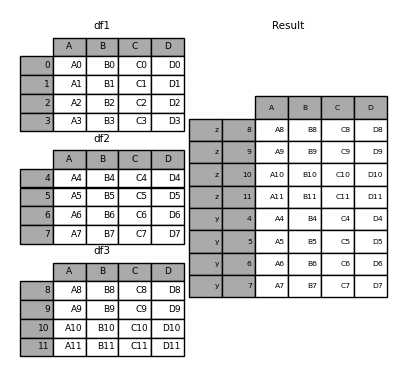

In [26]:
Image("res/merging_concat_dict_keys.png")

source:pandas.pydata.org

In [27]:
print('df = pd.DataFrame(np.random.randn(10, 4))')
df = pd.DataFrame(np.random.randn(7, 4))
print(df)
print("\npieces = [df[:2], df[2:4], df[4:]]")
pieces = [df[:2], df[2:4], df[4:]]
pieces

df = pd.DataFrame(np.random.randn(10, 4))
          0         1         2         3
0 -0.643751 -1.221386 -0.509650  1.314670
1 -0.605714 -0.864345  2.848923  1.323244
2 -0.663252 -3.378284 -0.404476 -0.123229
3  0.539890 -0.585878  0.720409 -0.024658
4 -1.687519 -0.442913  1.898646 -0.518678
5  0.878630 -0.481063  0.417932  1.613971
6 -1.175446 -0.145002  0.976169 -1.675819

pieces = [df[:2], df[2:4], df[4:]]


[          0         1         2         3
 0 -0.643751 -1.221386 -0.509650  1.314670
 1 -0.605714 -0.864345  2.848923  1.323244,
           0         1         2         3
 2 -0.663252 -3.378284 -0.404476 -0.123229
 3  0.539890 -0.585878  0.720409 -0.024658,
           0         1         2         3
 4 -1.687519 -0.442913  1.898646 -0.518678
 5  0.878630 -0.481063  0.417932  1.613971
 6 -1.175446 -0.145002  0.976169 -1.675819]

In [28]:
print("\npd.concat(pieces)")
pd.concat(pieces)


pd.concat(pieces)


,0,1,2,3
0,-0.643751,-1.221386,-0.509650,1.314670
1,-0.605714,-0.864345,2.848923,1.323244
2,-0.663252,-3.378284,-0.404476,-0.123229
3,0.539890,-0.585878,0.720409,-0.024658
4,-1.687519,-0.442913,1.898646,-0.518678
5,0.878630,-0.481063,0.417932,1.613971
6,-1.175446,-0.145002,0.976169,-1.675819


### Working with Missing Data

### np.nan is used to represent missing values

In [4]:
print("df_ = pd.DataFrame({'x': [1, 2, np.nan, 4, np.nan]})")
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4, np.nan]})
df_

df_ = pd.DataFrame({'x': [1, 2, np.nan, 4, np.nan]})


,x
0,1.0
1,2.0
2,NaN
3,4.0
4,NaN


In [ ]:
df_["y"]=[2,np.nan,4,5, np.nan]
df_

### Dropping rows that contain missing values 

In [ ]:
df_.dropna(subset=['x'])


### and you can fill the missing values with fillna..

<b>  filling nas with mean

In [ ]:
df_.mean()

In [ ]:
df_[["x"]].fillna(value=df_.x.mean())

In [ ]:
df_

In [ ]:
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
print('df_.fillna(value=0)\n',df_.fillna(value=0))
print("\ndf_.fillna(method=ffill)\n",df_.fillna(method='ffill'))
print("\ndf_.fillna(method=bfill)\n",df_.fillna(method='bfill'))

## Dummy variables
- Dummy variables are binary variables that represent the values that categorical variables hold. 
- It is an efficient representation for programming, preprocessing, analysing and ML tasks purposes.

#### Here is an example...

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
df

In [ ]:
pd.get_dummies(df)

In [ ]:
df.apply(np.unique)

### I/O operations
- reading data directly from csv, text, Excel files, DFS
- Pandas Data Frames are not persistent storage!
- writing data directly to file storage.

In [ ]:
students_df

In [ ]:
students_df.to_csv("students_df.csv", index=False)

In [ ]:
Image("res/Q&A.png")

In [ ]:
pd.read_csv('students_df.csv')